#### Project goal: 
Afinancial institution wants us to help them in identifying customer who have a lesser chance of defaulting on the loan.Company management has asked the data science team to build a predictive model that would predict who would be a good customer for them and come up with questions to ask the client when they are applying for loan based on the model.

- The Goal is to clean the dataset and get it ready for the Algorithms
- Build an model to predict who is a good customer
- Come up with questions to ask the customer when they apply for a loan

In [2785]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2786]:
data = pd.read_csv('1533148983_LoansTrainingSet.csv')
data.head(5)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [2787]:
data.shape

(256984, 19)

In [2788]:
# check duplicates since load ID is A unique Identifier for the loan information.
print('loan ID unique number : ', data['Loan ID'].nunique()) 
print('customer ID uniuqe number : ', data['Customer ID'].nunique())
# Loan ID unique number is less than data shape, it has duplicate records with same Loan id
# loan ID unique number is same as customer unique ID 

loan ID unique number :  215700
customer ID uniuqe number :  215700


In [2789]:
# drop duplicates
df = data.drop_duplicates(subset='Loan ID')
print(df.shape)

(215700, 19)


In [2790]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [2791]:
# check NaN colums
missing = df.isnull().sum()
missing[missing > 0]

Credit Score                     55008
Years in current job              8990
Annual Income                    55008
Months since last delinquent    118262
Bankruptcies                       452
Tax Liens                           22
dtype: int64

In [2792]:
# A tax lien is a legal claim by a government entity against a noncompliant taxpayer's assets. 
# Tax liens are a last resort to force an individual or business to pay back taxes.

In [2793]:
# data cleaning for for the all NON missing data
# convert data object data type to numerical data type 
# check the disbribution of numerical data type

In [2794]:
# Loan status : A categorical variable indicating if the loan was paid back or defaulted, (which the predict Y)
print(df['Loan Status'].unique())

['Fully Paid' 'Charged Off']


In [2795]:
dict = {'Fully Paid': 1, 'Charged Off' : 0}
df['loan_status'] = df['Loan Status'].map(dict)
print(df['loan_status'].unique())

[1 0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [2796]:
# Current Loan Amount : This is the loan amount that was either completely paid off, or the amount that was defaulted.
# Could convert to two features for completely paid off or the amount fefaulted later
col = 'Current Loan Amount'

In [2797]:
# plt.hist(df['Current Loan Amount'], bins = 200, range = [505, 99999999]);
# df.boxplot(column = 'Current Loan Amount')
print('current loan amount min : ', df['Current Loan Amount'].min())
print('current loan amount median : ', df['Current Loan Amount'].median())
print('current loan amount max : ', df['Current Loan Amount'].max())
df[col]
df[col].value_counts()#.sort_values()

current loan amount min :  505
current loan amount median :  14642.0
current loan amount max :  99999999


99999999    35210
9793           50
9820           48
5920           43
10192          43
10137          42
9941           42
10096          42
9781           42
10132          42
10025          42
10226          41
9839           41
10211          41
8154           41
7970           40
10214          40
9827           40
9984           40
9981           40
9851           40
9767           40
10248          39
9931           39
6122           39
10144          39
9947           39
9816           39
7938           39
10085          39
            ...  
32160           1
30113           1
27282           1
29329           1
25801           1
21925           1
13507           1
26209           1
3652            1
1861            1
5831            1
21528           1
23577           1
17434           1
28128           1
31773           1
25630           1
5264            1
21797           1
12953           1
1605            1
14019           1
17997           1
22009           1
21656     

In [2798]:
s = df[df[col]==99999999]
s.groupby(['loan_status'])[col].value_counts()

loan_status  Current Loan Amount
1            99999999               35210
Name: Current Loan Amount, dtype: int64

In [2799]:
s.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,loan_status
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3 years,Home Mortgage,64760.0,Debt Consolidation,$582.84,26.8,NaN,11,0,8880,22711,0.0,0.0,1
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744.0,6 years,Home Mortgage,65605.0,Debt Consolidation,$984.07,21.0,NaN,5,1,11514,17262,1.0,0.0,1


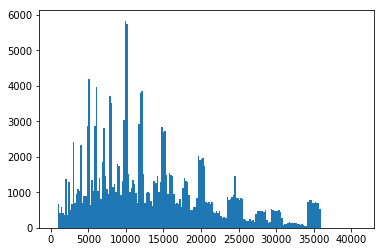

In [2800]:
plt.hist(df[col][df[col] < 99999999], bins = 200);

In [2801]:
# Term : A categorical variable indicating if it is a short term or long term loan
col = 'Term'

In [2802]:
print('shape: ', df[col].shape)
print('term missing: ', df[col].isnull().sum())
print('term date type', df[col].dtype)
print('term unique value: ', df[col].unique())

shape:  (215700,)
term missing:  0
term date type object
term unique value:  ['Short Term' 'Long Term']


In [2803]:
t = {'Short Term': 1, 'Long Term': 2}
df[col] = df[col].map(t)
print(df[col].unique())

[1 2]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [2804]:
# Credit Score : A value between 0 and 800 indicating the riskiness of the borrowers credit history.
col = 'Credit Score'

In [2805]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (215700,)
missing:  55008
date type float64
unique value:  334


In [2806]:
print('max : ', df[col].max())
print('median : ', df[col].median())
print('min : ', df[col].min())

max :  7510.0
median :  736.0
min :  585.0


In [2807]:
df[col].value_counts().sort_values(ascending=True).sample(10)

6380.0      28
612.0       26
691.0      468
607.0       24
6780.0      69
735.0     3050
626.0       58
6630.0      45
689.0      440
695.0      596
Name: Credit Score, dtype: int64

In [2808]:
abnormal = df[df[col] > 850]
print(abnormal.shape)
abnormal.head(3)
# abnormal[col] = abnormal[col].apply(lambda x : x / 10)

(14433, 20)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,loan_status
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,2,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0,0
55,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,1,7320.0,1 year,Own Home,25248.0,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0,0
71,000f1140-ef9f-42f9-9898-f9b3162bf0da,442c2d9b-3d95-44a9-bcb4-0dc80a941e3c,Charged Off,6007,1,7180.0,10+ years,Home Mortgage,43052.0,Debt Consolidation,$538.15,23.6,13.0,6,0,5077,7811,0.0,0.0,0


In [2809]:
# df[col] = df[col].apply(lambda x : x / 10 if x > 850 else x).astype(int) not applyable for NaN value 
df[col][df[col] > 850]  = df[col].apply(lambda x: x / 10).astype(float)
# df[col][df[col] > 850] = df[col] / 10

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2810]:
print('max : ', df[col].max())
print('median : ', df[col].median())
print('min : ', df[col].min())

max :  751.0
median :  732.0
min :  585.0


In [2811]:
def fun(x):
    if x < 550:
        x = 'bad'
    elif 550<= x < 670:
        x = 'fair'
    elif 670 <= x < 740:
        x = 'good'
    elif 740 <= x < 800:
        x = 'very_good'
    elif x >= 800:
        x = 'exceptional'
    return x

In [2812]:
df['credit_level'] = df[col].apply(fun)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [2813]:
df['credit_level'].value_counts()

good         98933
very_good    53255
fair          8504
Name: credit_level, dtype: int64

In [2814]:
# Years in current job : A categorical variable indicating how many years the customer has been in their current job.
col = 'Years in current job'

In [2815]:
print('shape: ', df[col].shape)
print('term missing: ', df[col].isnull().sum())
print('term date type', df[col].dtype)
print('term unique value: ', df[col].nunique())

shape:  (215700,)
term missing:  8990
term date type object
term unique value:  11


In [2816]:
df[col].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [2817]:
z = df[df[col].isnull()]
z.head(2)
# no clue to fill NaN records

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,loan_status,credit_level
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,Fully Paid,2036,1,733.0,NaN,Home Mortgage,55985.0,Debt Consolidation,...,19.8,29.0,7,0,10926,15676,0.0,0.0,1,good
38,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,Fully Paid,6114,1,NaN,NaN,Home Mortgage,NaN,Debt Consolidation,...,17.8,21.0,8,1,5772,13975,1.0,0.0,1,NaN


In [2818]:
df[df.Term == 1][col].value_counts()

10+ years    48907
2 years      15791
< 1 year     14122
3 years      13794
5 years      11699
1 year       11356
4 years      10767
6 years       9483
7 years       8922
8 years       7783
9 years       6160
Name: Years in current job, dtype: int64

In [2819]:
df[df.Term == 2][col].value_counts()

10+ years    17804
2 years       4040
3 years       3634
< 1 year      3422
5 years       3288
4 years       2865
7 years       2791
1 year        2774
6 years       2747
8 years       2449
9 years       2112
Name: Years in current job, dtype: int64

In [2820]:
print(df[col][df['Term'] == 2].isnull().sum())

1251


In [2821]:
# df[col][df['Term'] == 2] = df[col][df['Term'] == 2].apply(lambda x : x.fillna('10+ years'))
df[col][df[col].isna()] = df[col].apply(lambda x : '10+ years')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2822]:
df[col].isnull().sum()

0

In [2823]:
# Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". 
# If the value is OWN, then the customer is a home owner with no mortgage
col = 'Home Ownership'

In [2824]:
print('shape: ', df[col].shape)
print('term missing: ', df[col].isnull().sum())
print('term date type', df[col].dtype)
print('term unique value: ', df[col].nunique())

shape:  (215700,)
term missing:  0
term date type object
term unique value:  4


In [2825]:
print(df[col].unique())

['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']


In [2826]:
# Annual Income : The customer's annual income
col = 'Annual Income'

In [2827]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (215700,)
missing:  55008
date type float64
unique value:  58654


In [2828]:
# plt.hist(df[col], bins = 200)
print('min :', df[col].min())
print('median : ', df[col].median()) 
print('max : ', df[col].max())

min : 4033.0
median :  62806.0
max :  8713547.0


In [2829]:
df[col].value_counts()
#df[col].sort_values()

59346.0     26
61044.0     25
49585.0     24
60684.0     24
61188.0     24
60072.0     24
50255.0     23
51235.0     23
60828.0     23
50170.0     22
49075.0     22
49985.0     22
49630.0     22
60150.0     22
48955.0     22
61134.0     22
71071.0     21
50505.0     21
58872.0     21
61140.0     21
60348.0     21
60318.0     21
60522.0     21
59964.0     21
50720.0     21
76245.0     21
61038.0     20
49995.0     20
59604.0     20
50745.0     20
            ..
80259.0      1
56513.0      1
33433.0      1
26894.0      1
35218.0      1
92064.0      1
101267.0     1
30520.0      1
46212.0      1
36334.0      1
124408.0     1
187606.0     1
160523.0     1
25765.0      1
20066.0      1
53738.0      1
226067.0     1
113034.0     1
68048.0      1
95661.0      1
218548.0     1
80271.0      1
54364.0      1
61518.0      1
119694.0     1
50043.0      1
80273.0      1
141716.0     1
56522.0      1
15374.0      1
Name: Annual Income, Length: 58654, dtype: int64

In [2830]:
# analysis: annual income nan reocrds is the nan records of credit socre, we can drop it first for init model

In [2831]:
m = df[df['Credit Score'].isna() & df['Annual Income'].isna()]
credit_score_missing = df[df['Credit Score'].isna()]
Annual_Income_missing = df[df['Annual Income'].isna()]

In [2832]:
print(m.shape)
print(credit_score_missing.shape)
print(Annual_Income_missing.shape)
m.head()

(55008, 21)
(55008, 21)
(55008, 21)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,loan_status,credit_level
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,1,NaN,5 years,Rent,NaN,Debt Consolidation,...,17.7,NaN,7,0,11970,16579,0.0,0.0,1,NaN
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,1,NaN,< 1 year,Own Home,NaN,Debt Consolidation,...,9.9,43.0,7,0,6817,22800,0.0,0.0,0,NaN
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,2,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,...,14.9,NaN,10,0,28513,101110,0.0,0.0,0,NaN
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,1,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,...,17.8,NaN,13,1,8488,15866,1.0,0.0,1,NaN
26,0004d002-a494-4f8a-a528-a6d513812701,4722d542-6684-431c-afb6-ba2e847f1098,Fully Paid,4612,1,NaN,10+ years,Rent,NaN,Debt Consolidation,...,14.0,NaN,4,0,8919,9330,0.0,0.0,1,NaN


In [2833]:
df = df.dropna(subset=[col])

In [2834]:
print(df[col].isnull().sum())
print(df['Credit Score'].isnull().sum())

0
0


In [2835]:
print('min :', df[col].min())
print('median : ', df[col].median()) 
print('max : ', df[col].max())

min : 4033.0
median :  62806.0
max :  8713547.0


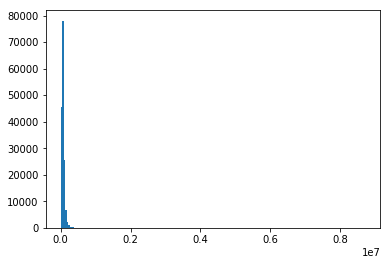

In [2836]:
plt.hist(df[col], bins = 200);

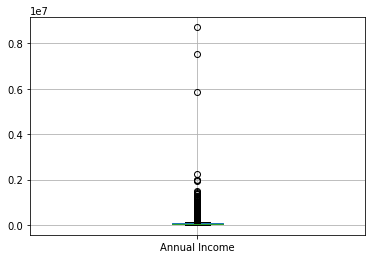

In [2837]:
df.boxplot(column = col)

In [2838]:
z = df.quantile(0.99).astype('int')
print(type(z))
z
# by check df.quantile(0.99), we may get records with annual income less than 244276.89

<class 'pandas.core.series.Series'>


Current Loan Amount             99999999
Term                                   2
Credit Score                         751
Annual Income                     244276
Years of Credit History               40
Months since last delinquent          81
Number of Open Accounts               26
Number of Credit Problems              2
Current Credit Balance             81579
Bankruptcies                           1
Tax Liens                              1
loan_status                            1
Name: 0.99, dtype: int64

In [2839]:
df.shape

(160692, 21)

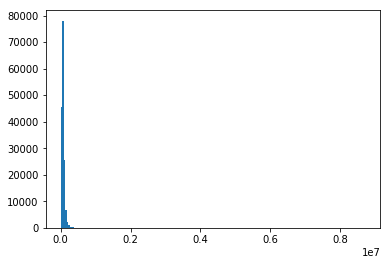

In [2840]:
plt.hist(df[col][df[col] < 99999999], bins = 200);

In [2841]:
df = df[df[col] < 250000]

In [2842]:
df.shape

(159299, 21)

In [2843]:
# Purpose : A description of the purpose of the loan
col = 'Purpose'

In [2844]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  0
date type object
unique value:  10


In [2845]:
print(df[col].unique())

['Debt Consolidation' 'other' 'Business Loan' 'Home Improvements'
 'Buy House' 'Other' 'Medical Bills' 'Buy a Car' 'Take a Trip'
 'Educational Expenses']


In [2846]:
df[col].value_counts()

Debt Consolidation      126471
Home Improvements         9406
other                     8669
Other                     6147
Business Loan             2604
Buy a Car                 2204
Medical Bills             1725
Take a Trip                977
Buy House                  946
Educational Expenses       150
Name: Purpose, dtype: int64

In [2847]:
df[col][df[col] == 'other'] = df[col].apply(lambda x : 'Other') # replace other with Other 

In [2848]:
df[col].value_counts()  # not very clear about buy house and debt consolidation

Debt Consolidation      126471
Other                    14816
Home Improvements         9406
Business Loan             2604
Buy a Car                 2204
Medical Bills             1725
Take a Trip                977
Buy House                  946
Educational Expenses       150
Name: Purpose, dtype: int64

In [2849]:
map1 = {'Debt Consolidation': 'debt_consolid', 'Other': 'Others', 'Home Improvements': 'home_improv', 
        'Business Loan': 'business_loan', 'Buy a Car':'car_purchasing', 'Medical Bills':'medical_bill', 
        'Take a Trip':'travel_house_edu', 'Buy House': 'travel_house_edu', 'Educational Expenses': 'travel_house_edu'}

In [2850]:
df['purpose_type'] = df[col].map(map1)

In [2851]:
df['purpose_type'].value_counts()

debt_consolid       126471
Others               14816
home_improv           9406
business_loan         2604
car_purchasing        2204
travel_house_edu      2073
medical_bill          1725
Name: purpose_type, dtype: int64

In [2852]:
# Monthly Debt : The customer's monthly payment for their existing loans
col = 'Monthly Debt'

In [2853]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  0
date type object
unique value:  106366


In [2854]:
print(df[col].unique())

['$584.03' '$1,106.04 ' '$1,321.85 ' ... '$1,412.33 ' '$47.11'
 '$2,525.82 ']


In [2855]:
df[col] = df[col].apply(lambda x: x.strip('$')).apply(lambda x : x.strip()).apply(lambda x : x.replace(',', ''))
df[col].sample(4)

33410     759.29
175435    512.13
80346     788.91
168631    540.39
Name: Monthly Debt, dtype: object

In [2856]:
df[col] = df[col].astype(float)
df[col]
print(df[col].dtype)

float64


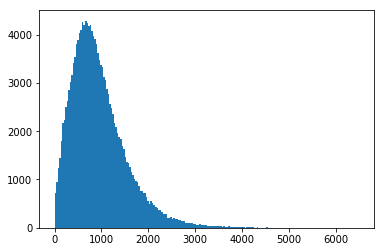

In [2857]:
df[col].value_counts()
plt.hist(df[col], bins = 200);

In [2858]:
# Years of Credit History : The years since the first entry in the customer’s credit history 
col = 'Years of Credit History'

In [2859]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  0
date type float64
unique value:  529


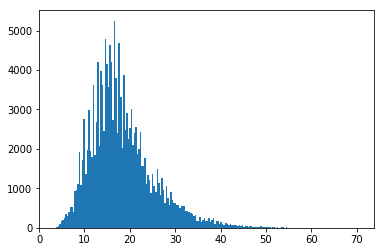

In [2860]:
plt.hist(df[col], bins = 200);

In [2861]:
# Months since last delinquent: Months since the last loan delinquent payment
col = 'Months since last delinquent'

In [2862]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  87560
date type float64
unique value:  125


In [2863]:
dd = df[[col,'Loan Status', 'Term', 'Home Ownership', 'Purpose']]
dd[dd[col].isnull()].sample(2)

,Months since last delinquent,Loan Status,Term,Home Ownership,Purpose
120523,NaN,Fully Paid,1,Own Home,Debt Consolidation
226578,NaN,Charged Off,2,Rent,Debt Consolidation


In [2864]:
d = df.groupby(['Loan Status', 'Term', 'Home Ownership', 'Purpose'])[col]
d.value_counts()

Loan Status  Term  Home Ownership  Purpose        Months since last delinquent
Charged Off  1     HaveMortgage    Take a Trip    5.0                             2
                                                  11.0                            2
                                                  17.0                            2
                                                  3.0                             1
                                                  8.0                             1
                                                  19.0                            1
                                                  22.0                            1
                                                  27.0                            1
                                                  28.0                            1
                                                  29.0                            1
                                                  34.0                           

In [2865]:
df[col] = d.apply(lambda x : x.fillna(x.median()))

In [2866]:
df[df[col].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,loan_status,credit_level,purpose_type
23630,17a177ea-c544-49d9-a4e2-5d232ce2b4ee,2bb8fc86-7a9e-4a2e-90b9-6cb554d36b8e,Fully Paid,99999999,2,745.0,10+ years,Own Home,42366.0,Take a Trip,...,NaN,6,0,410,18633,0.0,0.0,1,very_good,travel_house_edu
24412,186f0969-7af7-4860-9b78-15e10970a582,5e51fd4e-0ffa-4dc0-9e26-00ca76d671e3,Charged Off,8214,2,727.0,5 years,Rent,70402.0,Educational Expenses,...,NaN,11,0,12373,17803,0.0,0.0,0,good,travel_house_edu
69116,44b454d6-7e8b-421e-a590-a06a049212a0,ab3441e7-53f3-4299-a3c8-6dcfc8d8db15,Fully Paid,14889,2,713.0,10+ years,Own Home,127053.0,Take a Trip,...,NaN,17,0,21831,110819,0.0,0.0,1,good,travel_house_edu
106151,698513eb-4c32-440c-93e7-ed47ed99fd8f,286150d2-f3c5-4258-ba6f-cbfb719e3f6e,Charged Off,1023,2,698.0,7 years,Rent,6137.0,Educational Expenses,...,NaN,7,0,3483,9811,0.0,0.0,0,good,travel_house_edu
124408,7baf309f-176b-4cc8-9074-a6ddb9243b55,6a62eab6-9b59-41cb-b38d-60c5bdb2e617,Fully Paid,20570,2,721.0,10+ years,Own Home,62688.0,Take a Trip,...,NaN,10,1,15478,16643,1.0,0.0,1,good,travel_house_edu
202282,c9410b10-d9f7-436e-9426-7bbf7bf68b18,1a4fc510-7d47-44a1-8b36-65f1164e3ab9,Charged Off,6065,2,743.0,10+ years,Own Home,40432.0,Educational Expenses,...,NaN,5,0,1628,30155,0.0,0.0,0,very_good,travel_house_edu
242914,f1dde5c1-7e78-4a35-94da-1368f0cfc468,a5983e6b-751e-4cc8-8cf2-843b4fd93cf2,Charged Off,8266,2,734.0,2 years,Rent,44285.0,Educational Expenses,...,NaN,9,0,3138,4329,0.0,0.0,0,good,travel_house_edu


In [2867]:
 df[col].isnull().sum()

7

In [2868]:
dd = df.groupby(['Loan Status', 'Home Ownership', 'Purpose'])
# dd[dd[col].isnull()]
t = dd[col]

In [2869]:
df[col] = t.apply(lambda x : x.fillna(x.median()))

In [2870]:
df[col].isnull().sum()

0

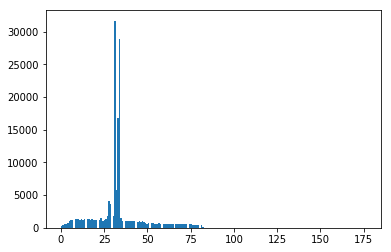

In [2871]:
plt.hist(df[col], bins = 200); # '>' not supported between instances of 'float' and 'method'
# df.boxplot(column = col)

In [2872]:
# Number of Open Accounts: The total number of open credit cards
col = 'Number of Open Accounts'

In [2873]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  0
date type int64
unique value:  57


In [2874]:
df[col].value_counts()

9     15191
10    14484
8     14399
11    13175
7     13154
12    11654
6     11055
13     9972
14     8359
5      7784
15     6625
16     5547
4      4559
17     4487
18     3556
19     2879
20     2196
3      2064
21     1746
22     1301
23     1043
24      821
2       677
25      591
26      459
27      344
28      234
29      173
30      144
31      123
32      118
33       74
34       68
35       49
36       31
37       27
38       24
39       20
1        19
41       16
40       16
42        8
45        7
43        6
47        3
44        2
46        2
50        2
52        2
53        2
56        1
55        1
48        1
49        1
51        1
54        1
0         1
Name: Number of Open Accounts, dtype: int64

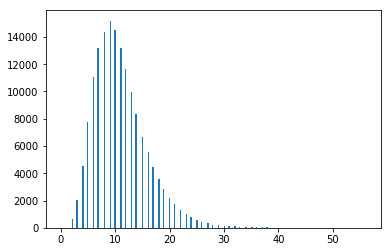

In [2875]:
plt.hist(df[col], bins = 200);

In [2876]:
# Number of Credit Problems : The number of credit problems in the customer records
col = 'Number of Credit Problems'

In [2877]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  0
date type int64
unique value:  12


In [2878]:
df[col].value_counts() # could be separate them into three four type: 0, 1, 2, more than 2

0     138330
1      18347
2       1827
3        500
4        166
5         73
6         29
7         10
8          8
10         4
9          4
11         1
Name: Number of Credit Problems, dtype: int64

In [2879]:
map2 = {0: '0_credit_problem', 1 : '1_credit_problem', 2 : '2_credit_problem', 3 : 'more_than_2',
        4 : 'more_than_2',5 : 'more_than_2',6 : 'more_than_2',7: 'more_than_2',8 : 'more_than_2',
        9 : 'more_than_2',10: 'more_than_2', 11: 'more_than_2'}

In [2880]:
df['credit_problem_severity'] = df[col].map(map2)

In [2881]:
df['credit_problem_severity'].value_counts()

0_credit_problem    138330
1_credit_problem     18347
2_credit_problem      1827
more_than_2            795
Name: credit_problem_severity, dtype: int64

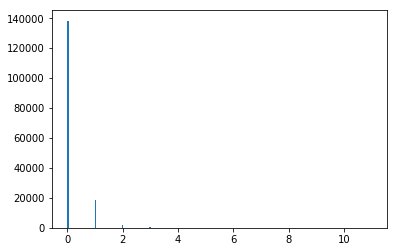

In [2882]:
plt.hist(df[col], bins=200);

In [2883]:
# Current Credit Balance: The current total debt for the customer
col = 'Current Credit Balance'

In [2884]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  0
date type int64
unique value:  41144


In [2885]:
df[col].value_counts()

0        988
10228     22
7346      20
4831      19
4654      19
6427      19
9430      19
6384      18
6201      18
6151      18
6259      18
5289      18
6910      18
5512      18
6292      18
6933      18
5841      18
4848      18
4353      18
6307      17
3600      17
7512      17
4632      17
6943      17
5856      17
3484      17
3918      17
8679      17
5659      17
6980      17
        ... 
28131      1
46906      1
54529      1
67022      1
34187      1
21696      1
48221      1
35931      1
29175      1
34302      1
62571      1
50130      1
52179      1
37848      1
33754      1
22461      1
48652      1
34315      1
40456      1
54785      1
43999      1
23617      1
25670      1
28602      1
54772      1
60503      1
26007      1
37976      1
32148      1
73561      1
Name: Current Credit Balance, Length: 41144, dtype: int64

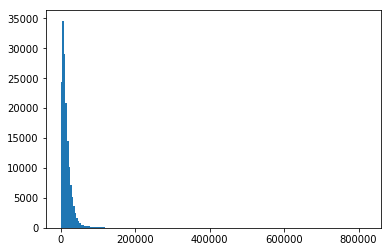

In [2886]:
plt.hist(df[col], bins=200);

In [2887]:
# Maximum Open Credit: The maximum credit limit for all credit sources
col = 'Maximum Open Credit'

In [2888]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type : ', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  0
date type :  object
unique value:  74347


In [2889]:
print(df[col].dtype)
#df[col] = df[col].apply(lambda x : x.strip())

object


In [2890]:
print('unique value : ', df[col].unique())
s = df[col].value_counts().sort_values(ascending=False) # string data type, with duplicate 0
df[col] = df[col].astype(str)  # it has '#VALUE!' 
s

unique value :  [16056 19149 28335 ... 55520 37004 62371]


0         997
0         153
21523      13
5981       12
16679      12
15847      12
12195      12
14048      12
12202      12
16709      12
10198      12
12024      12
10180      12
15348      11
12497      11
15218      11
12172      11
12306      11
10264      11
15829      11
11755      11
10440      11
8524       11
7140       11
14864      11
17928      11
15662      11
11128      11
14200      11
15959      11
         ... 
77291       1
99451       1
133380      1
13063       1
18644       1
2573        1
18646       1
48512       1
2568        1
133639      1
129546      1
10299       1
45611       1
128280      1
134718      1
15125       1
3611        1
3610        1
12935       1
3632        1
3633        1
9144        1
3634        1
3652        1
21819       1
211527      1
3648        1
15227       1
33568       1
32183       1
Name: Maximum Open Credit, Length: 74347, dtype: int64

In [2891]:
print('#VALUE! reocords : ', df[df[col] == '#VALUE!'].shape)
print('0 value records : ', df[df[col] == '0'].shape)
print(df[df[col] == '100000000'].shape) # we can use 100000 to replace #value! for a while for converting datatype

#VALUE! reocords :  (1, 23)
0 value records :  (1150, 23)
(0, 23)


In [2892]:
df[col] = df[col].apply(lambda x : x.replace('#VALUE!', '10000000'))

In [2893]:
df[col] = df[col].astype(int)

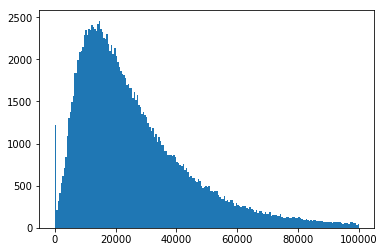

In [2894]:
plt.hist(df[col][df[col] < 100000 ], bins = 200);

In [2895]:
# Bankruptcies: The number of bankruptcies
col = 'Bankruptcies'

In [2896]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type : ', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  344
date type :  float64
unique value:  8


In [2897]:
df[col].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  7.,  6.])

In [2898]:
d = df.groupby(['Loan Status', 'Term', 'Home Ownership', 'Purpose'])[col] # these customer features
#d.value_counts()

In [2899]:
df[col] = d.apply(lambda x : x.fillna(x.median()))

In [2900]:
df[col].isnull().sum()

0

In [2901]:
df[col] = df[col].astype(int)

In [2902]:
print(df[col].unique())  # could group into four type : 0,1, 2, > 2
df[col].value_counts()

[0 1 2 3 4 5 7 6]


0    142469
1     16071
2       608
3       119
4        20
5         9
6         2
7         1
Name: Bankruptcies, dtype: int64

In [2903]:
map3 = {0 : '0_bankrupt', 1 : '1_bankrupt', 2 : '2_bankrupt', 3 : 'more_than_2_bankrupt', 4 : 'more_than_2_bankrupt',
        5 : 'more_than_2_bankrupt', 6 : 'more_than_2_bankrupt', 7 : 'more_than_2_bankrupt'}

In [2904]:
df['Bankruptcy_status'] = df[col].map(map3)

In [2905]:
df['Bankruptcy_status'].value_counts()

0_bankrupt              142469
1_bankrupt               16071
2_bankrupt                 608
more_than_2_bankrupt       151
Name: Bankruptcy_status, dtype: int64

In [2906]:
# plt.hist(df[col], bins = 200);

In [2907]:
# Tax Liens: The number of tax liens
col = 'Tax Liens'

In [2908]:
print('shape: ', df[col].shape)
print('missing: ', df[col].isnull().sum())
print('date type : ', df[col].dtype)
print('unique value: ', df[col].nunique())

shape:  (159299,)
missing:  14
date type :  float64
unique value:  12


In [2909]:
df[col].unique()

array([ 0.,  5., nan,  1.,  2.,  4.,  3.,  7.,  9.,  6.,  8., 10., 11.])

In [2910]:
d = df.groupby(['Loan Status', 'Term', 'Home Ownership', 'Purpose'])[col] # these customer features
#d.value_counts()

In [2911]:
df[col] = d.apply(lambda x : x.fillna(x.median()))

In [2912]:
df[col].isnull().sum()

0

In [2913]:
df[col] = df[col].astype(int)

In [2914]:
df[col].unique()

array([ 0,  5,  1,  2,  4,  3,  7,  9,  6,  8, 10, 11])

In [2915]:
df[col].value_counts()  # group them 0, 1, 2 >2

0     156545
1       1937
2        522
3        153
4         68
5         37
6         21
7          5
9          4
8          4
10         2
11         1
Name: Tax Liens, dtype: int64

In [2916]:
map4 = {0 : '0_tax_lien', 1 : '1_tax_lien', 2 : '2_tax_lien', 3 : 'more_than_2_tax_lien', 4 : 'more_than_2_tax_lien', 
        5 : 'more_than_2_tax_lien', 6 : 'more_than_2_tax_lien', 7 : 'more_than_2_tax_lien', 9 : 'more_than_2_tax_lien',
        10 : 'more_than_2_tax_lien', 11 : 'more_than_2_tax_lien'}

In [2917]:
df['tax_liens_status'] = df[col].map(map4)

In [2918]:
df['tax_liens_status'].value_counts()

0_tax_lien              156545
1_tax_lien                1937
2_tax_lien                 522
more_than_2_tax_lien       291
Name: tax_liens_status, dtype: int64

In [2919]:
dt = df.copy()

In [2920]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159299 entries, 0 to 256983
Data columns (total 25 columns):
Loan ID                         159299 non-null object
Customer ID                     159299 non-null object
Loan Status                     159299 non-null object
Current Loan Amount             159299 non-null int64
Term                            159299 non-null int64
Credit Score                    159299 non-null float64
Years in current job            159299 non-null object
Home Ownership                  159299 non-null object
Annual Income                   159299 non-null float64
Purpose                         159299 non-null object
Monthly Debt                    159299 non-null float64
Years of Credit History         159299 non-null float64
Months since last delinquent    159299 non-null float64
Number of Open Accounts         159299 non-null int64
Number of Credit Problems       159299 non-null int64
Current Credit Balance          159299 non-null int64
Maximum O

In [2921]:
drop_items = ['Loan Status', 'Bankruptcies', 'Credit Score', 'Purpose', 'Tax Liens', 'Number of Credit Problems']

In [2922]:
dt.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
loan_status                     0
credit_level                    0
purpose_type                    0
credit_problem_severity         0
Bankruptcy_status               0
tax_liens_status                4
dtype: int64

In [2923]:
dt = dt.drop(columns = drop_items)

In [2924]:
dt.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term',
       'Years in current job', 'Home Ownership', 'Annual Income',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit', 'loan_status',
       'credit_level', 'purpose_type', 'credit_problem_severity',
       'Bankruptcy_status', 'tax_liens_status'],
      dtype='object')

In [2925]:
print(dt.shape)

(159299, 19)


In [2926]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159299 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         159299 non-null object
Customer ID                     159299 non-null object
Current Loan Amount             159299 non-null int64
Term                            159299 non-null int64
Years in current job            159299 non-null object
Home Ownership                  159299 non-null object
Annual Income                   159299 non-null float64
Monthly Debt                    159299 non-null float64
Years of Credit History         159299 non-null float64
Months since last delinquent    159299 non-null float64
Number of Open Accounts         159299 non-null int64
Current Credit Balance          159299 non-null int64
Maximum Open Credit             159299 non-null int64
loan_status                     159299 non-null int64
credit_level                    159299 non-null object
purpose_type                    159299 non-null object
credit_prob

In [2927]:
# remove outfilers

In [2928]:
outliers = dt.quantile(0.99)

In [2929]:
print(outliers.dtype)
outliers

float64


Current Loan Amount             99999999.00
Term                                   2.00
Annual Income                     199776.08
Monthly Debt                        2903.72
Years of Credit History               40.60
Months since last delinquent          79.00
Number of Open Accounts               26.00
Current Credit Balance             75589.50
Maximum Open Credit               162253.68
loan_status                            1.00
Name: 0.99, dtype: float64

In [2930]:
outliers['Current Loan Amount']

99999999.0

In [2931]:
#dt['Current Loan Amount'][dt['Current Loan Amount'] < outliers['Current Loan Amount']]

In [2932]:
def print_len(dt, outliers):
    columns = ['Current Loan Amount','Term', 'Annual Income','Monthly Debt', 'Years of Credit History',
               'Months since last delinquent', 'Number of Open Accounts', 'Current Credit Balance','Maximum Open Credit',
               'loan_status']
    for item in columns:
        print(item, len(dt[item][dt[item] < outliers[item]]))

In [2933]:
print_len(dt, outliers)

Current Loan Amount 124420
Term 123534
Annual Income 157706
Monthly Debt 157705
Years of Credit History 157703
Months since last delinquent 157664
Number of Open Accounts 157339
Current Credit Balance 157706
Maximum Open Credit 157706
loan_status 26573


In [2934]:
selected_items_for_outliers = ['Annual Income', 'Current Credit Balance', 'Maximum Open Credit']

In [2935]:
print(dt.shape)

(159299, 19)


In [2936]:
def get_dt_after_outliers(dt, outliers, items):
    for item in items:
        dt = dt[dt[item] < outliers[item]]
    return dt

In [2937]:
dt = get_dt_after_outliers(dt, outliers, selected_items_for_outliers)

In [2938]:
dt.shape

(155596, 19)

In [2939]:
# create dummy 

In [2940]:
print(dt.columns)

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term',
       'Years in current job', 'Home Ownership', 'Annual Income',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit', 'loan_status',
       'credit_level', 'purpose_type', 'credit_problem_severity',
       'Bankruptcy_status', 'tax_liens_status'],
      dtype='object')


In [2941]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155596 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         155596 non-null object
Customer ID                     155596 non-null object
Current Loan Amount             155596 non-null int64
Term                            155596 non-null int64
Years in current job            155596 non-null object
Home Ownership                  155596 non-null object
Annual Income                   155596 non-null float64
Monthly Debt                    155596 non-null float64
Years of Credit History         155596 non-null float64
Months since last delinquent    155596 non-null float64
Number of Open Accounts         155596 non-null int64
Current Credit Balance          155596 non-null int64
Maximum Open Credit             155596 non-null int64
loan_status                     155596 non-null int64
credit_level                    155596 non-null object
purpose_type                    155596 non-null object
credit_prob

In [2942]:
dummy_items = ['Term', 'Years in current job', 'credit_level', 'Home Ownership', 'purpose_type', 
               'credit_problem_severity', 'Bankruptcy_status', 'tax_liens_status']

In [2943]:
dt_dummy = pd.get_dummies(dt, columns=dummy_items, drop_first=True)

In [2944]:
dt_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155596 entries, 0 to 256983
Data columns (total 42 columns):
Loan ID                                     155596 non-null object
Customer ID                                 155596 non-null object
Current Loan Amount                         155596 non-null int64
Annual Income                               155596 non-null float64
Monthly Debt                                155596 non-null float64
Years of Credit History                     155596 non-null float64
Months since last delinquent                155596 non-null float64
Number of Open Accounts                     155596 non-null int64
Current Credit Balance                      155596 non-null int64
Maximum Open Credit                         155596 non-null int64
loan_status                                 155596 non-null int64
Term_2                                      155596 non-null uint8
Years in current job_10+ years              155596 non-null uint8
Years in current job_

In [2945]:
# correllation

In [2946]:
# modeling 

In [2947]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.cross_validation import train_test_split as tts

In [2948]:
Dependent = 'loan_status'
dropped_items = ['loan_status', 'Loan ID', 'Customer ID'] 

In [2949]:
dt_dummy.shape

(155596, 42)

In [2950]:
train_dt = dt_dummy[:120000]
test_dt = dt_dummy[120001: ]

In [2982]:
X_test_dt = test_dt.copy()

In [2985]:
X_test_dt = X_test_dt.drop(columns=dropped_items)

In [2986]:
X_test_dt.columns

Index(['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Term_2', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'credit_level_good',
       'credit_level_very_good', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'purpose_type_business_loan', 'purpose_type_car_purchasing',
       'purpose_type_debt_consolid', 'purpose_type_home_improv',
       'purpose_type_medical_bill', 'purpose_type_travel_house_edu',
       'credit_problem_severity_1_credit_problem',
       'credit_pr

In [2987]:
y_test_dt = test_dt[Dependent]

In [2988]:
print(X_test_dt.shape)
print(y_test_dt.shape)

(35595, 39)
(35595,)


In [2989]:
print(train_dt.shape)
print(test_dt.shape)

(120000, 42)
(35595, 42)


In [2990]:
X = train_dt.copy()
X = X.drop(columns=dropped_items)
print(X.shape)

(120000, 39)


In [2991]:
y = train_dt[Dependent]
print(y.shape)

(120000,)


In [2992]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(90000, 39) (30000, 39)
(90000,) (30000,)


In [2993]:
gbc = GradientBoostingClassifier()
r   = RandomForestClassifier()
d   = DecisionTreeClassifier()
log = LogisticRegression()
k   = KNeighborsClassifier()
g   = GaussianNB()
b   = BernoulliNB()

In [2994]:
algorithms = [g, b, k, log, d, r, gbc] 
names = ['GuassianNB', 'Bernoulli NB', 'K-Nearest','Logistic', 'Decision Tree', 
         'Random Forest', 'Gradient Boosting'] 

In [2995]:
# define fuction to fit model with X_train, y_train

In [2996]:
def train_model(X_train, X_test, y_train, y_test, algorithms, names, ave_method = 'binary'):
    
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(X_train, y_train)

    # lists to reocrd X_train, y_train fit result 
    accuracy_train = []
    precision_trian = []
    recall_train = []
    f1_train = []
    
    # lists to reocrd X_test, y_test fit result
    accuracy_test = []
    precision_test = []
    recall_test = []
    f1_test = []
  
    for alg in algorithms:
        # get score for train set
        accuracy_train.append(accuracy_score(y_train, alg.predict(X_train)))
        precision_trian.append(precision_score(y_train, alg.predict(X_train), average = ave_method))
        recall_train.append(recall_score(y_train, alg.predict(X_train), average = ave_method))
        f1_train.append(f1_score(y_train, alg.predict(X_train),average = ave_method))
        
        # get score for test data
        accuracy_test.append(accuracy_score(y_test, alg.predict(X_test)))
        precision_test.append(precision_score(y_test, alg.predict(X_test), average = ave_method))
        recall_test.append(recall_score(y_test,alg.predict(X_test), average = ave_method))
        f1_test.append(f1_score(y_test, alg.predict(X_test), average = ave_method))
        
    # metrics for reporting
    cols = ['train_accuracy','train_precision','train_recall','train_F1', 'test_accuracy', 
            'test_precision', 'test_recall', 'test_F1']
    
    metrics = pd.DataFrame(columns = cols, index = names)
    metrics['train_accuracy'] = accuracy_test
    metrics['train_precision'] = precision_test
    metrics['train_recall'] = recall_test
    metrics['train_F1'] = f1_test
    
    metrics['test_accuracy'] = accuracy_test
    metrics['test_precision'] = precision_test
    metrics['test_recall'] = recall_test
    metrics['test_F1'] = f1_test
    
    return metrics.sort_values('test_accuracy', ascending = False)

In [2997]:
# define a function to predict result 

In [3002]:
def predict_results(X, y, X_test_dt, y_test_dt, 
                    ave_method, selected_alg, test_dt):
    
    alg = selected_alg.fit(X, y)
    
    y_predict = alg.predict(X_test_dt)
    prob_0 = alg.predict_proba(X_test_dt)[:, 0]
    prob_1 = alg.predict_proba(X_test_dt)[:, 1]
    accuracy = accuracy_score(y_test_dt, y_predict)
    precision = precision_score(y_test_dt, y_predict, 
                                average = ave_method)
    recall = recall_score(y_test_dt, y_predict, average = ave_method)
    F1 = f1_score(y_test_dt, y_predict, average = ave_method)

    # metrics for result reporting 
    cols = ['Loan ID', 
            'predicted_loan_status', 
            'prob_0','prob_1', 
            'accuracy', 
            'precision', 
            'recall', 
            'F1']
    prediction = pd.DataFrame(columns = cols)
    prediction['Loan ID'] = test_dt['Loan ID']
    prediction['predicted_loan_status'] = y_predict
    prediction['prob_0'] = prob_0
    prediction['prob_1'] = prob_1
    prediction['accuracy'] = accuracy
    prediction['precision'] = precision
    prediction['recall'] = recall
    prediction['F1'] = F1
    
    features = pd.DataFrame()
    features['feature'] = X_test_dt.columns
    features['importance'] = selected_alg.feature_importances_
    
    return prediction, features

In [1]:
# trian model on X_train, y_test

In [2966]:
train_model_results = train_model(X_train, X_test, y_train, y_test, 
                                  algorithms, names, 
                                  ave_method = 'binary')

In [2967]:
train_model_results

,train_accuracy,train_precision,train_recall,train_F1,test_accuracy,test_precision,test_recall,test_F1
Gradient Boosting,0.861833,0.863997,0.989023,0.922292,0.861833,0.863997,0.989023,0.922292
Random Forest,0.850200,0.882207,0.945559,0.912785,0.850200,0.882207,0.945559,0.912785
Logistic,0.828933,0.829016,0.999879,0.906466,0.828933,0.829016,0.999879,0.906466
Bernoulli NB,0.828500,0.829558,0.998231,0.906111,0.828500,0.829558,0.998231,0.906111
Decision Tree,0.814600,0.891330,0.884162,0.887732,0.814600,0.891330,0.884162,0.887732
K-Nearest,0.801033,0.839037,0.940413,0.886837,0.801033,0.839037,0.940413,0.886837
GuassianNB,0.383733,0.999687,0.256725,0.408535,0.383733,0.999687,0.256725,0.408535


In [2968]:
test_dt.shape
#test_dt.info()
test_dt['Loan ID'].dtype

dtype('O')

In [3003]:
# predit result on X_test, y_test

In [3004]:
predicted_results, feature_importance = predict_results(X, y, 
                                                        X_test_dt, 
                                                        y_test_dt, 
                                                        'weighted', 
                                                        gbc, test_dt)

In [3006]:
predicted_results.head(3)

,Loan ID,predicted_loan_status,prob_0,prob_1,accuracy,precision,recall,F1
198246,c533fcb1-8440-4095-bc92-f43fcbb36ea9,1,0.003673,0.996327,0.867622,0.860134,0.867622,0.837134
198248,c5349d53-b947-4ca4-8817-363fdbb84b30,1,0.006435,0.993565,0.867622,0.860134,0.867622,0.837134
198249,c534ab86-23c5-443e-ae43-ed0806c81560,1,0.095872,0.904128,0.867622,0.860134,0.867622,0.837134


In [3012]:
feature_importance.sort_values(by = ['importance'], 
                               ascending= False, 
                               inplace= True)

In [3019]:
feature_importance = 
feature_importance[feature_importance['importance'] > 0]
feature_importance.head(10)

,feature,importance
4,Months since last delinquent,0.316989
0,Current Loan Amount,0.172129
1,Annual Income,0.125347
21,Home Ownership_Home Mortgage,0.056434
2,Monthly Debt,0.050001
20,credit_level_very_good,0.039849
8,Term_2,0.037621
6,Current Credit Balance,0.035918
7,Maximum Open Credit,0.030075
3,Years of Credit History,0.030055


In [ ]:
# questions to ask the customer when they apply for a loan 
# - Months since last deliniquent
# - Annual income
# - how many you want pay for loan each month?
# - credit score
# - long term loan or short loan? 